In [1]:
import pandas as pd
#from tweepy import Stream
from tweepy import OAuthHandler
from tweepy import API
import tweepy 
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt 
api_key = 'oW5oqepN92CiAKjoiG3EGT5Zv'
api_secret = 'SlccTbVV8tLqlYdJpUlWiPMuyFMNULzspmhIwU12j1nsISmi9b'
access_token = '1603309278-bNzG1STvCSZi2fIHSyYtJd8brVCElb1N1ToLBRq'
access_token_secret = 'fYPd8T9PEuvWcz9WiWIq7Excg3OnhcmDVYVgeaOXVNlBn'
auth = OAuthHandler(api_key,api_secret)
auth.set_access_token(access_token,access_token_secret)
api = API(auth,wait_on_rate_limit=True)

In [2]:
inp = input('Enter your topic to monitor: ')
tweets = tweepy.Cursor(api.search,q=inp,lang='en',since='2021-01-01').items(2000)
myData = [[tweet.user.screen_name,tweet.author.followers_count,tweet.created_at,tweet.text] for tweet in tweets]


In [3]:
myData = pd.DataFrame(myData,columns=['User','Followers','Created At','Tweet'])
myData

,User,Followers,Created At,Tweet
0,SudharTamil,285,2021-09-11 06:45:42,RT @LoyalSachinFan: Not sure who needs to hear...
1,nikhil89nick,492,2021-09-11 06:45:41,RT @bhogleharsha: There is always a silver lin...
2,nazmabeg77,664,2021-09-11 06:45:35,@TheMiddleStump Still ipl and PSL much better ...
3,SheikFazil15,182,2021-09-11 06:45:34,RT @huwzat: I appreciate the ECB needs to stay...
4,GodIsGr82148817,86,2021-09-11 06:45:33,RT @ComeOnCricket: Most times Conceding 200 or...
...,...,...,...,...
1995,Rohit4581398155,16,2021-09-11 05:42:25,RT @MIFCKARNATAKA: 5 IPL Trophies &amp; 1 CL T...
1996,SaiVaib41131476,4,2021-09-11 05:42:22,@spirit04cricket @dines17bijarnia @diplal @imV...
1997,NiruPavan,654,2021-09-11 05:42:21,"RT @mufaddal_vohra: AB De Villiers, Glenn Maxw..."
1998,harry_kul,36,2021-09-11 05:42:21,@iaminimitable @SteveGiles9 @markpougatch You ...


In [4]:
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9] +', '',text)
    text = re.sub(r'#','',text)
    text = re.sub(r'RT[\s] :+','',text)
    text = re.sub(r'https:\/\/.*[\r\n]*', '',text, flags=re.MULTILINE)
    text = re.sub(r':','',text)
    return text
myData['Tweet'] = myData['Tweet'].apply(cleanText)
#myData['Tweet'] = myData['Tweet'].apply(cleanText)
#myData['Tweet'] = myData['Tweet'].apply(cleanText)
    #myData['Created At'] = myData['Created At'].apply(removeText)
myData['Created At'] = pd.to_datetime(myData['Created At']).dt.date
myData.head()



,User,Followers,Created At,Tweet
0,SudharTamil,285,2021-09-11,RT @LoyalSachinFan Not sure who needs to hear ...
1,nikhil89nick,492,2021-09-11,RT @bhogleharsha There is always a silver lini...
2,nazmabeg77,664,2021-09-11,@TheMiddleStump Still ipl and PSL much better ...
3,SheikFazil15,182,2021-09-11,RT @huwzat I appreciate the ECB needs to stay ...
4,GodIsGr82148817,86,2021-09-11,RT @ComeOnCricket Most times Conceding 200 or ...


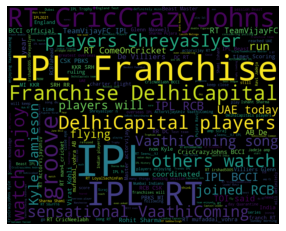

In [5]:
allwords = ' '.join([rev for rev in myData['Tweet']])
wordcloud = WordCloud(width=1000,height=800,random_state=21,max_font_size=160).generate(allwords)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [6]:
 def getSubjectivity(text):
     return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity 

myData['Subjectivity'] = myData['Tweet'].apply(getSubjectivity)

myData['Polarity'] = myData['Tweet'].apply(getPolarity)
myData

,User,Followers,Created At,Tweet,Subjectivity,Polarity
0,SudharTamil,285,2021-09-11,RT @LoyalSachinFan Not sure who needs to hear ...,0.944444,0.375000
1,nikhil89nick,492,2021-09-11,RT @bhogleharsha There is always a silver lini...,0.400000,0.100000
2,nazmabeg77,664,2021-09-11,@TheMiddleStump Still ipl and PSL much better ...,0.650000,0.150000
3,SheikFazil15,182,2021-09-11,RT @huwzat I appreciate the ECB needs to stay ...,0.400794,0.328571
4,GodIsGr82148817,86,2021-09-11,RT @ComeOnCricket Most times Conceding 200 or ...,0.500000,0.500000
...,...,...,...,...,...,...
1995,Rohit4581398155,16,2021-09-11,RT @MIFCKARNATAKA 5 IPL Trophies &amp; 1 CL Tr...,0.000000,0.000000
1996,SaiVaib41131476,4,2021-09-11,@spirit04cricket @dines17bijarnia @diplal @imV...,0.000000,0.000000
1997,NiruPavan,654,2021-09-11,"RT @mufaddal_vohra AB De Villiers, Glenn Maxwe...",0.000000,0.000000
1998,harry_kul,36,2021-09-11,@iaminimitable @SteveGiles9 @markpougatch You ...,0.000000,0.000000


In [7]:
def getAnalysis(score):
    if score<0:
        if score<-0.50:
            return 'Very Negative'
        else:
            return 'Negative'
    elif score == 0.00:
        return 'Neutral'
    else:
        if score > 0.50:
            return 'Very Positive'
        else:
            return 'Positive'

myData['Sentiment'] = myData['Polarity'].apply(getAnalysis)
myData

,User,Followers,Created At,Tweet,Subjectivity,Polarity,Sentiment
0,SudharTamil,285,2021-09-11,RT @LoyalSachinFan Not sure who needs to hear ...,0.944444,0.375000,Positive
1,nikhil89nick,492,2021-09-11,RT @bhogleharsha There is always a silver lini...,0.400000,0.100000,Positive
2,nazmabeg77,664,2021-09-11,@TheMiddleStump Still ipl and PSL much better ...,0.650000,0.150000,Positive
3,SheikFazil15,182,2021-09-11,RT @huwzat I appreciate the ECB needs to stay ...,0.400794,0.328571,Positive
4,GodIsGr82148817,86,2021-09-11,RT @ComeOnCricket Most times Conceding 200 or ...,0.500000,0.500000,Positive
...,...,...,...,...,...,...,...
1995,Rohit4581398155,16,2021-09-11,RT @MIFCKARNATAKA 5 IPL Trophies &amp; 1 CL Tr...,0.000000,0.000000,Neutral
1996,SaiVaib41131476,4,2021-09-11,@spirit04cricket @dines17bijarnia @diplal @imV...,0.000000,0.000000,Neutral
1997,NiruPavan,654,2021-09-11,"RT @mufaddal_vohra AB De Villiers, Glenn Maxwe...",0.000000,0.000000,Neutral
1998,harry_kul,36,2021-09-11,@iaminimitable @SteveGiles9 @markpougatch You ...,0.000000,0.000000,Neutral


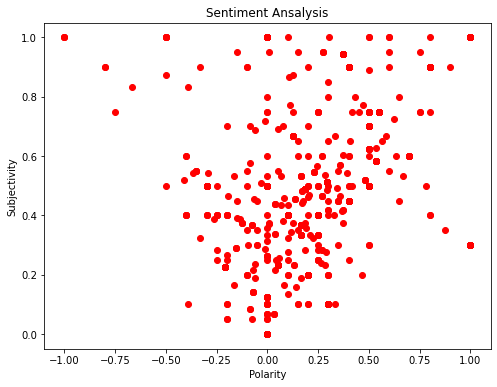

In [8]:
plt.figure(figsize=(8,6))
for i in range(0,myData.shape[0]):
    plt.scatter(myData['Polarity'][i],myData['Subjectivity'][i],color='r')
plt.title('Sentiment Ansalysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [9]:
vptweets = myData[myData.Sentiment == 'Very Positive']
vptweets = vptweets['Tweet']
print('% of very positive tweets: ',round((vptweets.shape[0] / myData.shape[0]) * 100 , 1))

% of very positive tweets:  14.6


In [10]:
ptweets = myData[myData.Sentiment == 'Positive']
ptweets = ptweets['Tweet']
print('% of positive tweets',round((ptweets.shape[0] / myData.shape[0]) * 100 , 1))

% of positive tweets 28.6


In [11]:
ntweets = myData[myData.Sentiment == 'Negative']
ntweets = ntweets['Tweet']
print('% of negative tweets: ',round((ntweets.shape[0] / myData.shape[0]) * 100 , 1))

% of negative tweets:  7.8


In [12]:
vntweets = myData[myData.Sentiment == 'Very Negative']
vntweets = vntweets['Tweet']
print('% of very negative tweets: ',round((vntweets.shape[0] / myData.shape[0]) * 100 , 1))

% of very negative tweets:  0.4


In [13]:
nttweets = myData[myData.Sentiment == 'Neutral']
nttweets = nttweets['Tweet']
print('% of neutral tweets: ',round((nttweets.shape[0] / myData.shape[0]) * 100 , 1))

% of neutral tweets:  48.5


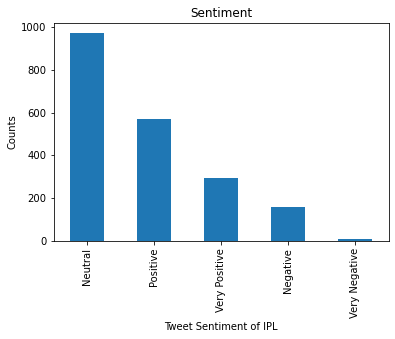

Neutral          971
Positive         572
Very Positive    293
Negative         157
Very Negative      7
Name: Sentiment, dtype: int64

In [14]:
myData['Sentiment'].value_counts()
plt.title('Sentiment')
plt.xlabel(f'Tweet Sentiment of {inp}'.format(inp=inp))
plt.ylabel('Counts')
myData['Sentiment'].value_counts().plot(kind='bar')
plt.show()
myData['Sentiment'].value_counts()


In [15]:
from collections import defaultdict
pos = defaultdict(int)
neg = defaultdict(int)
#for i in myData.index:
#    pos[myData['Created At']] = 0
#    neg[myData['Created At']] = 0

for i in myData.index:
    if myData['Sentiment'][i] == 'Positive' or myData['Sentiment'][i] == 'Very Positive':
        a = str(myData['Created At'][i])
        pos[a] += 1 

    if myData['Sentiment'][i] == 'Negative' or myData['Sentiment'][i] == 'Very Negative':
        a = str(myData['Created At'][i])
        neg[a] += 1   


print('Positive Mentions:',pos)
print('Negative Mentions',neg)


Positive Mentions: defaultdict(<class 'int'>, {'2021-09-11': 865})
Negative Mentions defaultdict(<class 'int'>, {'2021-09-11': 164})


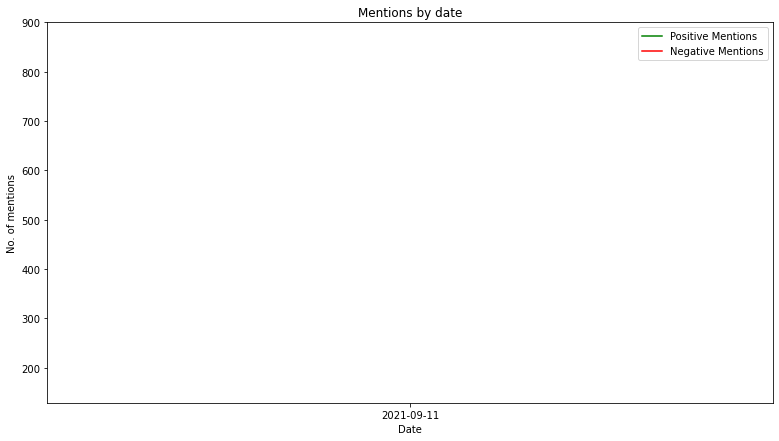

In [ ]:
plt.figure(figsize=(13,7))
plt.plot(range(len(pos)),list(pos.values()),color='g',label='Positive Mentions')
plt.plot(range(len(neg)),list(neg.values()),color='r',label='Negative Mentions')
plt.xticks(range(len(pos)),list(pos.keys()))
plt.xlabel('Date')
plt.ylabel('No. of mentions')
plt.title('Mentions by date')
plt.legend()

In [17]:
x = myData['Sentiment']
y = myData['Created At']
myData.columns

Index(['User', 'Followers', 'Created At', 'Tweet', 'Subjectivity', 'Polarity',
       'Sentiment'],
      dtype='object')

In [18]:
from tkinter import *
from tabulate import tabulate
from collections import defaultdict
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from PIL import ImageTk,Image
class MyWindow:
    def __init__(self, win):
        self.lbl1=Label(win, text='Your topic to monitor ')
        self.t1=Entry(bd=4)
        self.lbl1.place(x=100, y=30)
        self.t1.place(x=270, y=30)
        self.b1=Button(win,bg='darkcyan',fg='white',activebackground='green' ,text='Sentiments of Tweets',command=self.tweetSentiment)
        self.b2=Button(win,bg='darkcyan',fg='white',activebackground='green', text='Word Frequency', command=self.wordFrequency)
        self.b3=Button(win,bg='darkcyan', fg='white',activebackground='green',text='Polarity/Subjectivity Graph', command=self.psPlot)
        self.b4=Button(win,bg='darkcyan', fg='white',activebackground='green',text='Sentiment Count Graph', command=self.countPlot)
        self.b5=Button(win,bg='darkcyan', fg='white',activebackground='green',text='Day wise Graph', command=self.dayPlot)
        self.b1.place(x=100, y=90)
        self.b2.place(x=230, y=90)
        self.b3.place(x=335, y=90)
        self.b4.place(x=490, y=90)
        self.b5.place(x=630, y=90)

    def cleanText(self,text):
        text = re.sub(r'@[A-Za-z0-9] +', '',text)
        text = re.sub(r'#','',text)
        text = re.sub(r'RT[\s] :+','',text)
        text = re.sub(r'https:\/\/.*[\r\n]*', '',text, flags=re.MULTILINE)
        text = re.sub(r':','',text)
        return text

    def tweetSentiment(self):
       try:
            self.canvas.get_tk_widget().pack_forget()
       except AttributeError:
            pass
       inp =self.t1.get()
       tweets = tweepy.Cursor(api.search,q=inp,lang='en',since='2021-01-01').items(800)
       self.myData = [[tweet.user.screen_name,tweet.author.followers_count,tweet.created_at,tweet.text] for tweet in tweets]
       self.myData = pd.DataFrame(self.myData,columns=['User','Followers','Created At','Tweet'])
       
       self.myData['Tweet'] = self.myData['Tweet'].apply(self.cleanText)
           
       self.myData['Created At'] = pd.to_datetime(self.myData['Created At']).dt.date
       self.myData['Subjectivity'] = self.myData['Tweet'].apply(self.getSubjectivity)

       self.myData['Polarity'] = self.myData['Tweet'].apply(self.getPolarity)
       self.myData['Sentiment'] = self.myData['Polarity'].apply(self.getAnalysis)
       #self.myData.style.set_properties(subset=['tweet'], **{'width': '10px'})

       #self.myData = self.myData.applymap(lambda x: str(x).ljust(6))
       #self.myData.columns = self.myData.columns.map(lambda x: str(x).ljust(6))
       pd.options.display.max_colwidth = 80
       self.textLabel1 = Label(window, text= self.myData.iloc[:,[3,6]].head(7),padx=10,pady=10,width=80)
       self.textLabel1.pack()
       self.textLabel1.place(x=90,y=160) 
       

    def wordFrequency(self):
        try:
            self.canvas.get_tk_widget().pack_forget()
        except AttributeError:
            pass
        self.textLabel1.destroy()
        fig = Figure(figsize=(5,3))
        a = fig.add_subplot(111)
        allwords = ' '.join([rev for rev in self.myData['Tweet']])
        wordcloud = WordCloud(width=1000,height=800,random_state=21,max_font_size=130).generate(allwords)
        a.imshow(wordcloud,interpolation='bilinear')
        a.axis('off')
        self.canvas = FigureCanvasTkAgg(fig, master=window)
        self.canvas.get_tk_widget().pack( expand=1)
        self.canvas.draw()

    def psPlot(self):
        try:
            self.canvas.get_tk_widget().pack_forget()
        except AttributeError:
            pass
        fig = Figure(figsize=(10,5.5))
        a = fig.add_subplot(111)
        for i in range(0,self.myData.shape[0]):
            a.scatter(self.myData['Polarity'][i],self.myData['Subjectivity'][i],color='r')
        a.invert_yaxis()

        a.set_title ("Polarity/Subjectivity Plot", fontsize=16)
        a.set_ylabel("Subjectivity", fontsize=14)
        a.set_xlabel("Polarity", fontsize=14)

        self.canvas = FigureCanvasTkAgg(fig, master=window)
        self.canvas.get_tk_widget().pack( expand=1)
        self.canvas.draw()
    def countPlot(self):
        try:
            self.canvas.get_tk_widget().pack_forget()
        except AttributeError:
            pass
        fig = Figure(figsize=(10,6.3))
        a = fig.add_subplot(111)
        self.myData['Sentiment'].value_counts().plot(kind='bar',legend=True,ax=a)
        #a.invert_yaxis()

        #a.set_title ("Polarity/Subjectivity Plot", fontsize=16)
        #a.set_ylabel("Subjectivity", fontsize=14)
        #a.set_xlabel("Polarity", fontsize=14)

        self.canvas = FigureCanvasTkAgg(fig, master=window)
        self.canvas.get_tk_widget().pack( expand=1)
        self.canvas.draw()
       

    def dayPlot(self):
        try:
            self.canvas.get_tk_widget().pack_forget()
        except AttributeError:
            pass
        #self.plot()
        #for item in self.canvas.get_tk_widget().find_all():
         #   self.canvas.get_tk_widget().delete(item)
        pos = defaultdict(int)
        neg = defaultdict(int)


        for i in self.myData.index:
            if self.myData['Sentiment'][i] == 'Positive' or self.myData['Sentiment'][i] == 'Very Positive':
                a = str(self.myData['Created At'][i])
                pos[a] += 1 

            if self.myData['Sentiment'][i] == 'Negative' or self.myData['Sentiment'][i] == 'Very Negative':
                a = str(self.myData['Created At'][i])
                neg[a] += 1   
        fig = Figure(figsize=(10,5.5))
        a = fig.add_subplot(111)
        
        a.plot(range(len(pos)),list(pos.values()),color='g',label='Positive Mentions')
        a.plot(range(len(neg)),list(neg.values()),color='r', label='Negative Mentions')
        #a.invert_yaxis()
        a.set_xticks(range(len(pos)))
        a.set_xticklabels(list(pos.keys()))
        a.set_title("Date wise mentions", fontsize=16)
        a.set_ylabel("No. of mentions", fontsize=14)
        a.set_xlabel("Date", fontsize=14)
        a.legend()
        self.canvas = FigureCanvasTkAgg(fig, master=window)
        self.canvas.get_tk_widget().pack( expand=1)
        self.canvas.draw()


   


    def getSubjectivity(self,text):
        return TextBlob(text).sentiment.subjectivity

    def getPolarity(self,text):
        return TextBlob(text).sentiment.polarity 

    def getAnalysis(self,score):
        if score<0:
            if score<-0.50:
                return 'V. Neg'
            else:
                return 'Negative'
        elif score == 0.00:
            return 'Neutral'
        else:
            if score > 0.50:
                return 'V. Pos'
            else:
                return 'Positive'





window=Tk()

# bg=ImageTk.PhotoImage(file='bgcolour.jpg')
#canvas1 = Canvas( window,width=900,height=900) 
#  
#canvas1.pack(fill = "both", expand = True) 
##  
### Display image 
#canvas1.create_image( 0, 0, image = bg, anchor = "nw")
mywin=MyWindow(window) 
window.title('Sentiment Analysis')
window.configure(bg='lightskyblue')
window.geometry("800x700+10+10")


#im=Image.open('C:\\VS Coding\\Python\\Sentiment Analysis Project\\bgcolour.jpg')

#background_image=ImageTk.PhotoImage(im)
#background_label =Label(window, image=background_image)
#background_label.place(x=0, y=0, relwidth=2, relheight=2)
window.main0loop()